In [1]:
#选择调用的库，这里需要安装numpy, pandas, matplotlib(用来画图), sklearn和tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras import layers,models 
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam


## Get Data

In [2]:
#从csv文件中读取数据
train_set=pd.read_csv("./exoTrain.csv")
valid_set=pd.read_csv("./exoTest.csv")

## Data visualization 

### Stars with Exoplanets

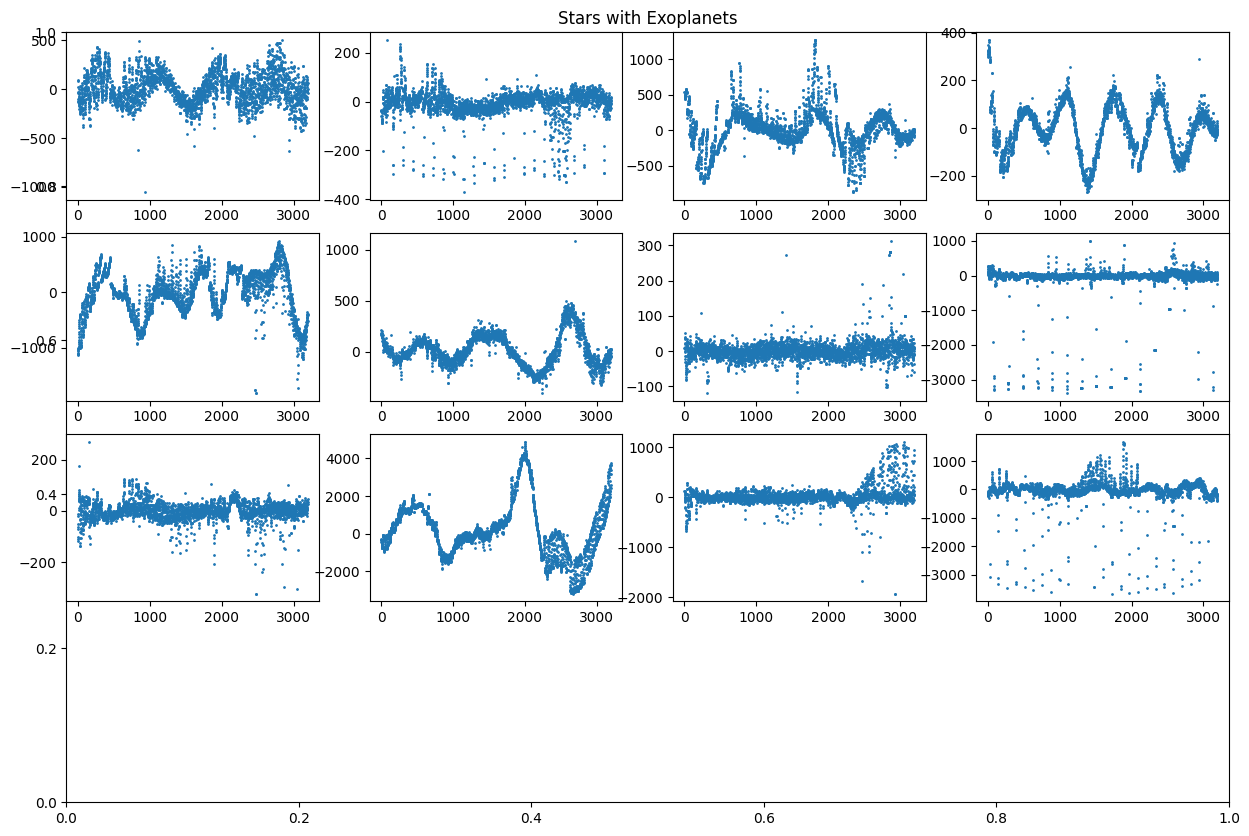

In [3]:
#用散点图展示前十二个数据（系外行星）中光强随时间的变化
fig = plt.figure(figsize=(15,10))
plt.title('Stars with Exoplanets')
for i in range(12):
    ax = fig.add_subplot(4,4,i+1)
    ax.scatter(np.arange(3197),train_set[train_set['LABEL'] == 2].iloc[i,1:],s=1)


### Stars without Exoplanets

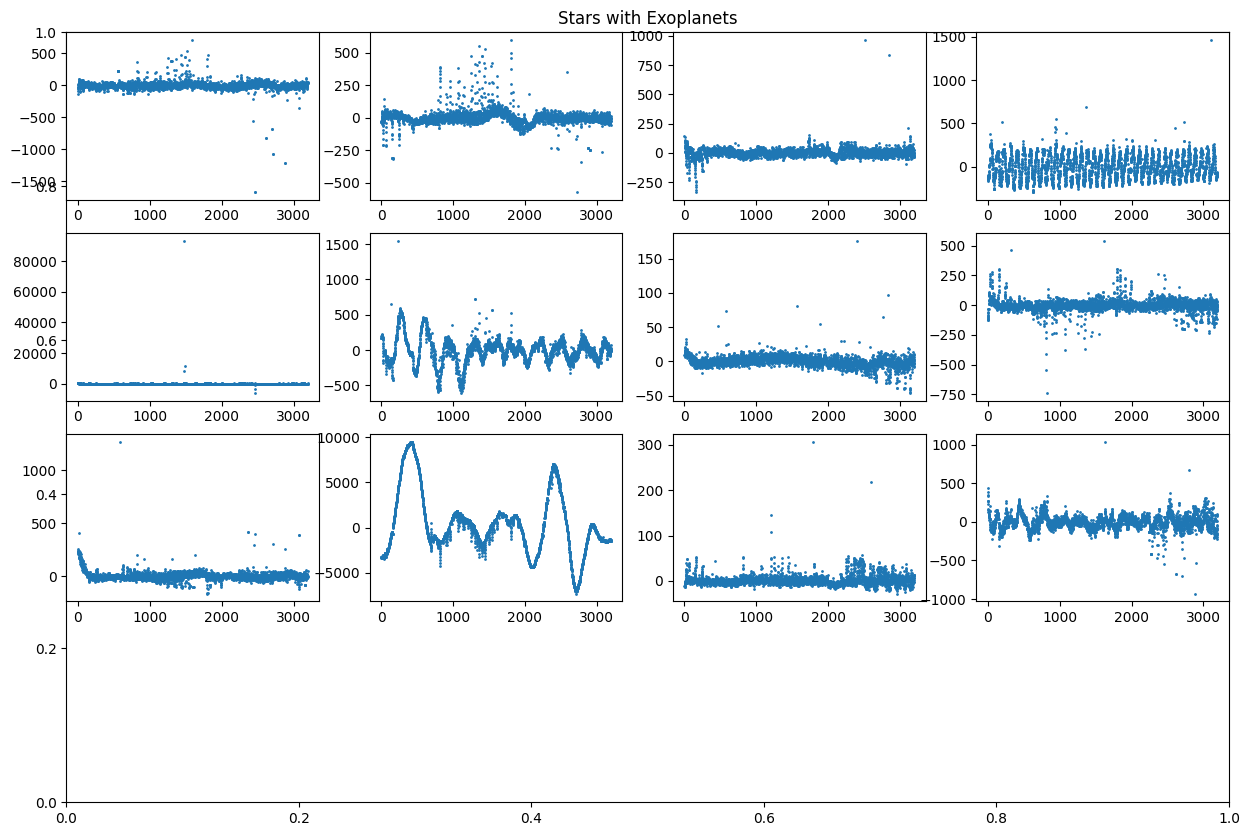

In [4]:
#用散点图展示前十二个数据（非系外行星）中光强随时间的变化
fig = plt.figure(figsize=(15,10))
plt.title('Stars with Exoplanets')
for i in range(12):
    ax = fig.add_subplot(4,4,i+1)
    ax.scatter(np.arange(3197),train_set[train_set['LABEL']==1].iloc[i,1:],s=1)

## data process

In [5]:
#得到数据的特征X和标签Y，train代表训练集，valid代表验证集（用来检测模型的准确率）
train_X = train_set.drop(labels="LABEL",axis=1)
train_Y = train_set["LABEL"]
valid_X = valid_set.drop(labels="LABEL",axis=1)
valid_Y = valid_set["LABEL"]


In [6]:
#将标签1，2改成0，1使其表示更加形象化（0代表无系外行星，0代表有系外行星）
function = lambda x:1 if x == 2 else 0
valid_Y = valid_Y.apply(function)
train_Y = train_Y.apply(function)

# get_model

1、首先我们使用支持向量机作为模型，这里直接调用的sklearn库里的svc模型（这里超参数采用默认参数,[链接](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)）

Accuracy on Validation set : 0.987719298245614


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



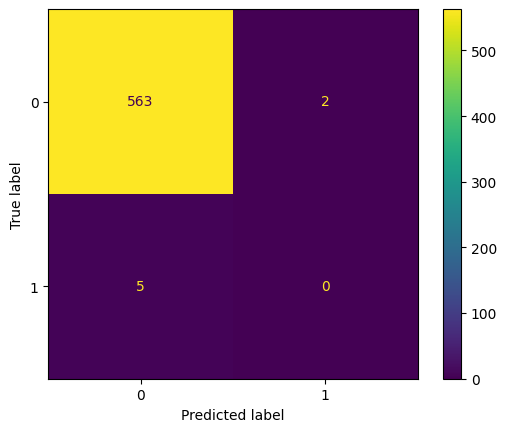

In [7]:
#调用SVC（一种支持向量机分类算法），内核选择sigmoid核
model = SVC(kernel='sigmoid')
model.fit(train_X,train_Y)
pre=model.predict(valid_X)
print('Accuracy on Validation set :',accuracy_score(valid_Y, pre))
print("\n")
print(classification_report(valid_Y, pre))
print(ConfusionMatrixDisplay.from_predictions(valid_Y, pre))


2、然后尝试使用随机森林进行训练，依然直接调用sklearn里的模型（这里超参数采用默认参数,[链接](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)）

Accuracy on Validation set : 0.9912280701754386


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



e:\Anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


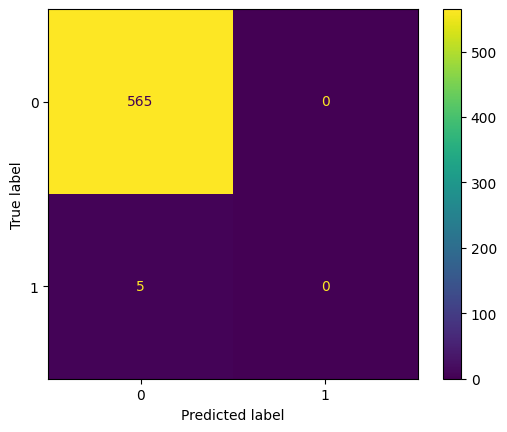

In [12]:
model = RandomForestClassifier()
model.fit(train_X,train_Y)
pre=model.predict(valid_X)
print('Accuracy on Validation set :',accuracy_score(valid_Y, pre))
print("\n")
print(classification_report(valid_Y, pre))
print(ConfusionMatrixDisplay.from_predictions(valid_Y, pre))

3、这次我们使用多层感知机进行训练，中间加入了两个隐藏层，分别为300个节点和10个节点，优化方案采用adam（比较先进的优化器）

Accuracy on Validation set : 0.987719298245614


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       565
           1       0.25      0.20      0.22         5

    accuracy                           0.99       570
   macro avg       0.62      0.60      0.61       570
weighted avg       0.99      0.99      0.99       570



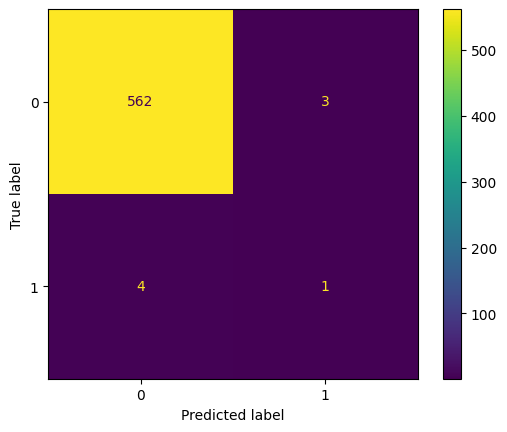

In [13]:
#use the standard model of MLP from sklearn
model = MLPClassifier(hidden_layer_sizes=(300,10),activation='relu',solver='adam',max_iter = 300)
#train the model
model.fit(train_X,train_Y)
pre=model.predict(valid_X)
print('Accuracy on Validation set :',accuracy_score(valid_Y, pre))
print("\n")
print(classification_report(valid_Y, pre))
print(ConfusionMatrixDisplay.from_predictions(valid_Y, pre))

4、最后我们使用CNN（卷积神经网络）作为训练模型

In [16]:
#定义一个函数显示损失（loss）和准确率（accuracy）
def graph_acc(history):
    # Plot loss during training
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

    # Plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

Epoch 1/30
255/255 - 6s - loss: 17.3971 - accuracy: 0.9425 - val_loss: 0.0208 - val_accuracy: 1.0000 - 6s/epoch - 23ms/step
Epoch 2/30
255/255 - 5s - loss: 5.5103 - accuracy: 0.9712 - val_loss: 0.0676 - val_accuracy: 0.9921 - 5s/epoch - 20ms/step
Epoch 3/30
255/255 - 5s - loss: 7.8397 - accuracy: 0.9644 - val_loss: 0.1557 - val_accuracy: 0.9912 - 5s/epoch - 20ms/step
Epoch 4/30
255/255 - 5s - loss: 0.7611 - accuracy: 0.9840 - val_loss: 0.0989 - val_accuracy: 1.0000 - 5s/epoch - 21ms/step
Epoch 5/30
255/255 - 5s - loss: 1.2354 - accuracy: 0.9872 - val_loss: 2.3661 - val_accuracy: 0.9715 - 5s/epoch - 21ms/step
Epoch 6/30
255/255 - 6s - loss: 5.7819 - accuracy: 0.9776 - val_loss: 0.0162 - val_accuracy: 1.0000 - 6s/epoch - 22ms/step
Epoch 7/30
255/255 - 5s - loss: 0.6519 - accuracy: 0.9892 - val_loss: 0.0237 - val_accuracy: 1.0000 - 5s/epoch - 21ms/step
Epoch 8/30
255/255 - 5s - loss: 0.1062 - accuracy: 0.9909 - val_loss: 0.0256 - val_accuracy: 1.0000 - 5s/epoch - 22ms/step
Epoch 9/30
255/

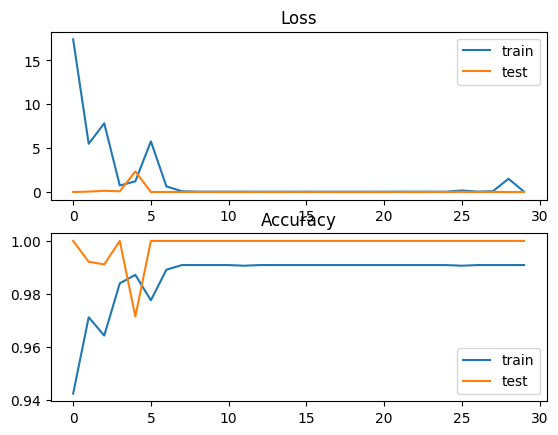

18/18 [==============================] - 0s 8ms/step


In [18]:
#构建CNN模型
n_features = train_X.shape[1]
model = Sequential()
model.add(Reshape((3197, 1), input_shape=(3197,)))
#添加了一个卷积层，使用了十个大小为2*2的卷积核，激活函数采用了relu，正则化方式使用L2
model.add(Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(n_features, 1), kernel_regularizer='l2'))
#添加了一个大小为2，步长为2的池化层
model.add(MaxPooling1D(pool_size=2, strides=2))
#采用dropout作为正则化方法
model.add(Dropout(0.2))
model.add(Flatten())
#添加了一个全连接层
model.add(Dense(48, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(18, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer = Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#通过fit函数对模型进行训练并返回训练记录
history = model.fit(train_X, train_Y, validation_split = 0.2, batch_size=16,  epochs=30, verbose=2)
#展示训练过程
graph_acc(history)
pre=model.predict(valid_X)


Accuracy on Validation set : 0.9912280701754386


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



e:\Anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Anaconda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


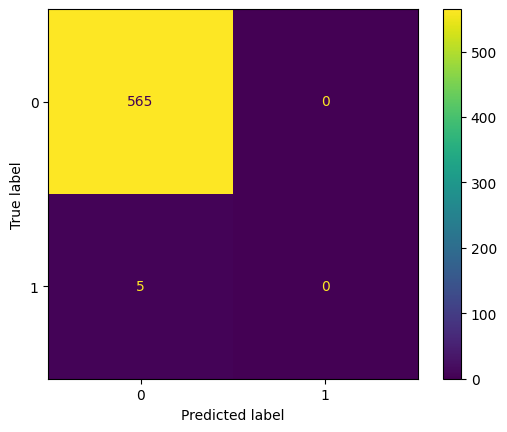

In [19]:
#得到得结果为0~1的小数，将大于0.5的定义为1，小于等于0.5的定义为0
pre = (pre > 0.5).astype("int32")
print('Accuracy on Validation set :',accuracy_score(valid_Y, pre))
print("\n")
print(classification_report(valid_Y, pre))
print(ConfusionMatrixDisplay.from_predictions(valid_Y, pre))